In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('NVDA_1999-01-01_2024-12-04.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True) 
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.017325,2714688000
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.019140,510480000
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.017655,343200000
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.017600,244368000
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.017544,227520000
...,...,...,...,...,...,...
2024-11-26,137.699997,139.300003,135.669998,136.919998,136.919998,190287700
2024-11-27,135.009995,137.220001,131.800003,135.339996,135.339996,226370900
2024-11-29,136.779999,139.350006,136.050003,138.250000,138.250000,141863200


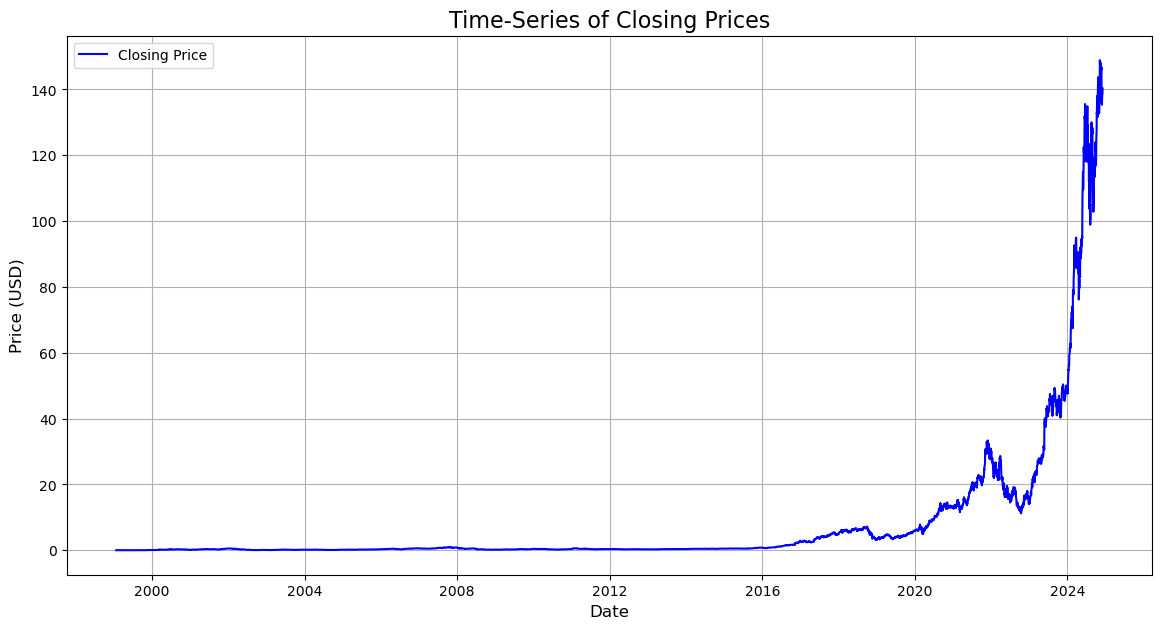

In [11]:
# 1. Time-Series Plot of Closing Prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.title('Time-Series of Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

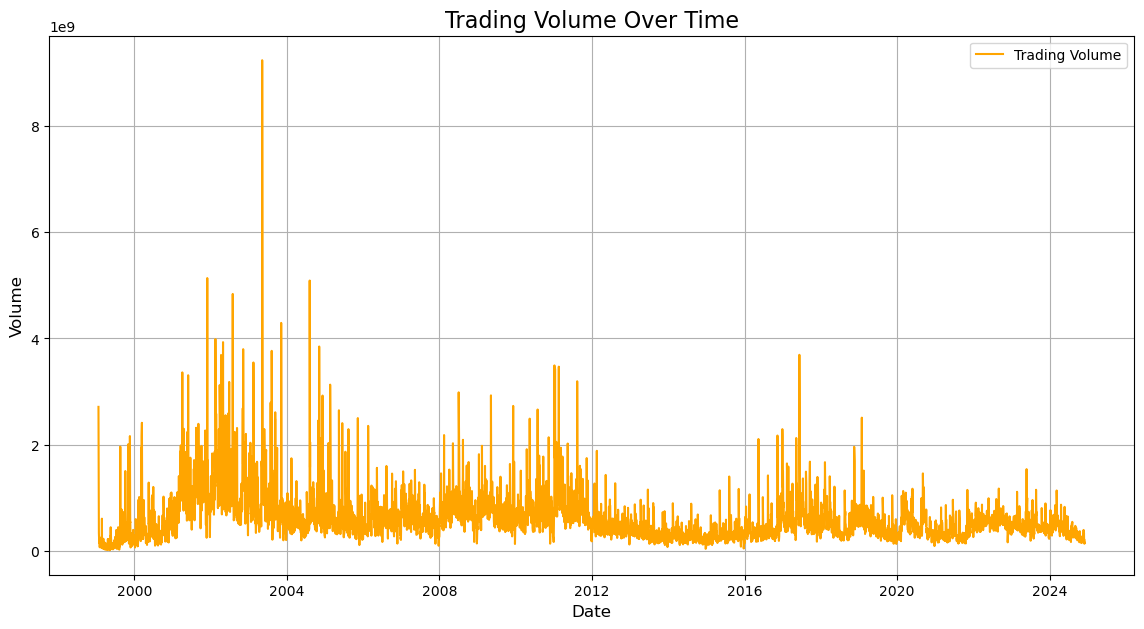

In [4]:
# 2. Volume Over Time
plt.figure(figsize=(14, 7))
plt.plot(data['Volume'], label='Trading Volume', color='orange')
plt.title('Trading Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid()
plt.show()

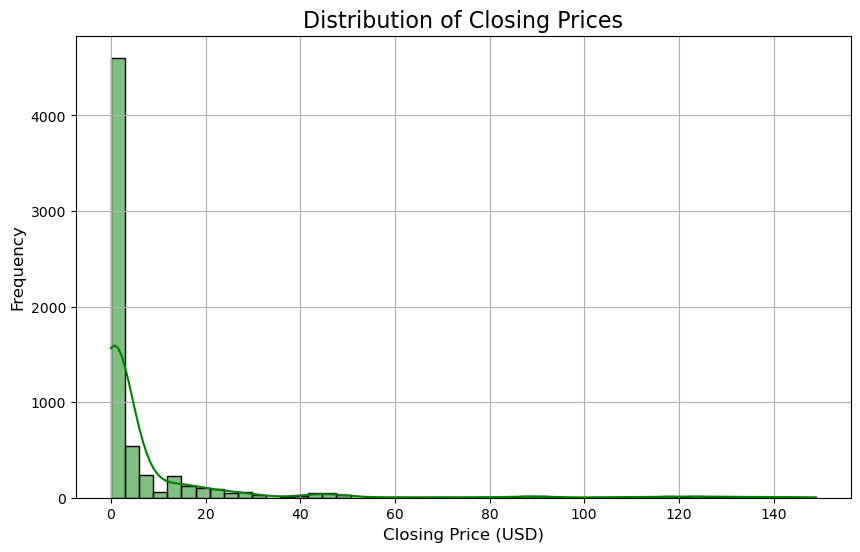

In [5]:
# 3. Distribution of Closing Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], kde=True, bins=50, color='green')
plt.title('Distribution of Closing Prices', fontsize=16)
plt.xlabel('Closing Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

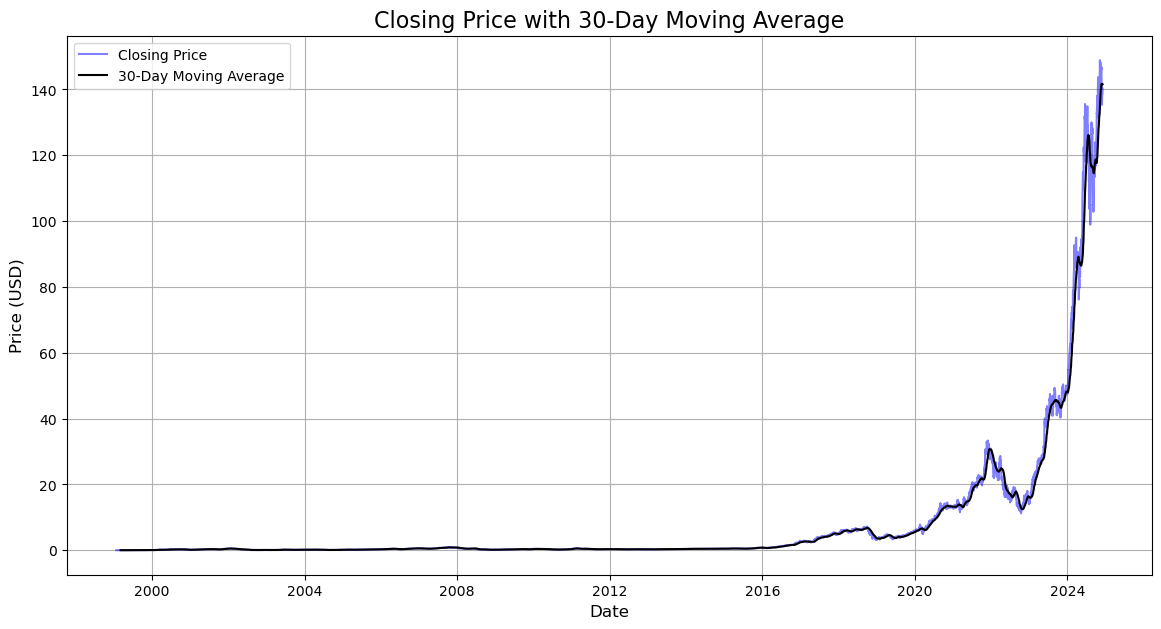

In [6]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib as mdates
data['Close_30_MA'] = data['Close'].rolling(window=30).mean()  # 30-day moving average

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(data['Close_30_MA'], label='30-Day Moving Average', color='black')
plt.title('Closing Price with 30-Day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

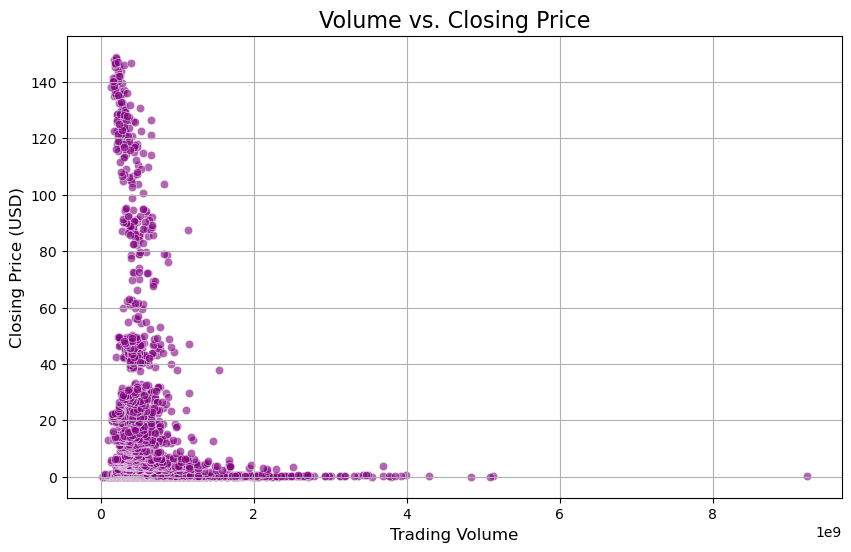

In [7]:
# Volume vs. Close Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Volume'], y=data['Close'], alpha=0.6, color='purple')
plt.title('Volume vs. Closing Price', fontsize=16)
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid()
plt.show()

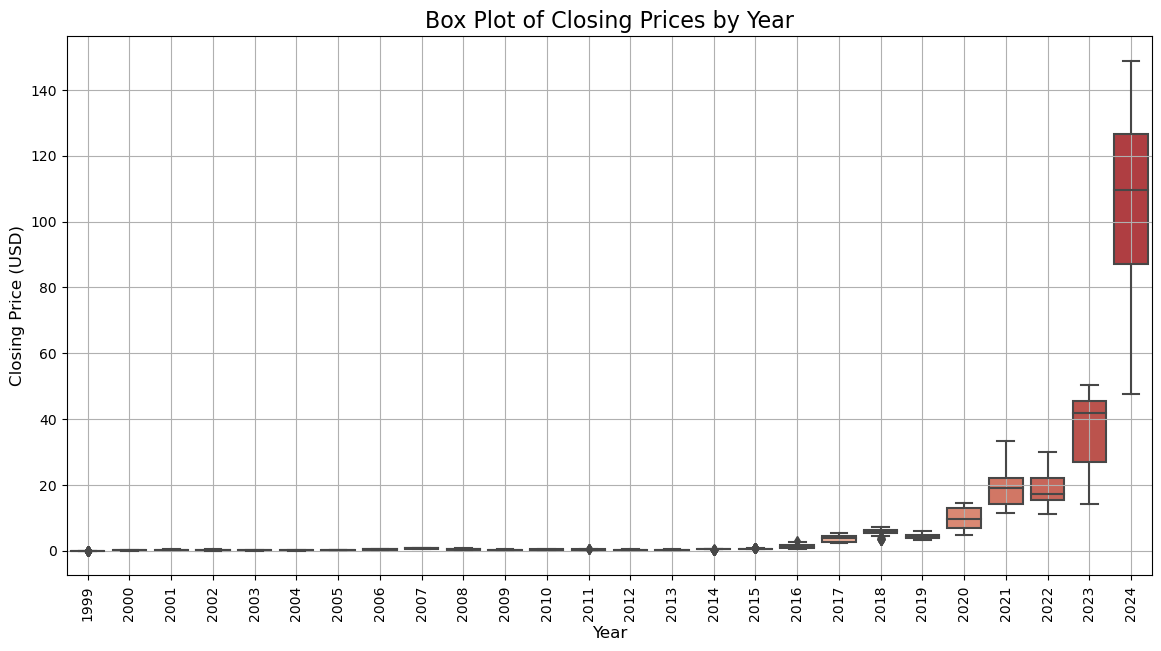

In [8]:
# Box Plot of Closing Prices by Year
data['Year'] = data.index.year
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Close', data=data.reset_index(), palette='coolwarm')
plt.title('Box Plot of Closing Prices by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.xticks(rotation=90)
plt.grid()
plt.show()

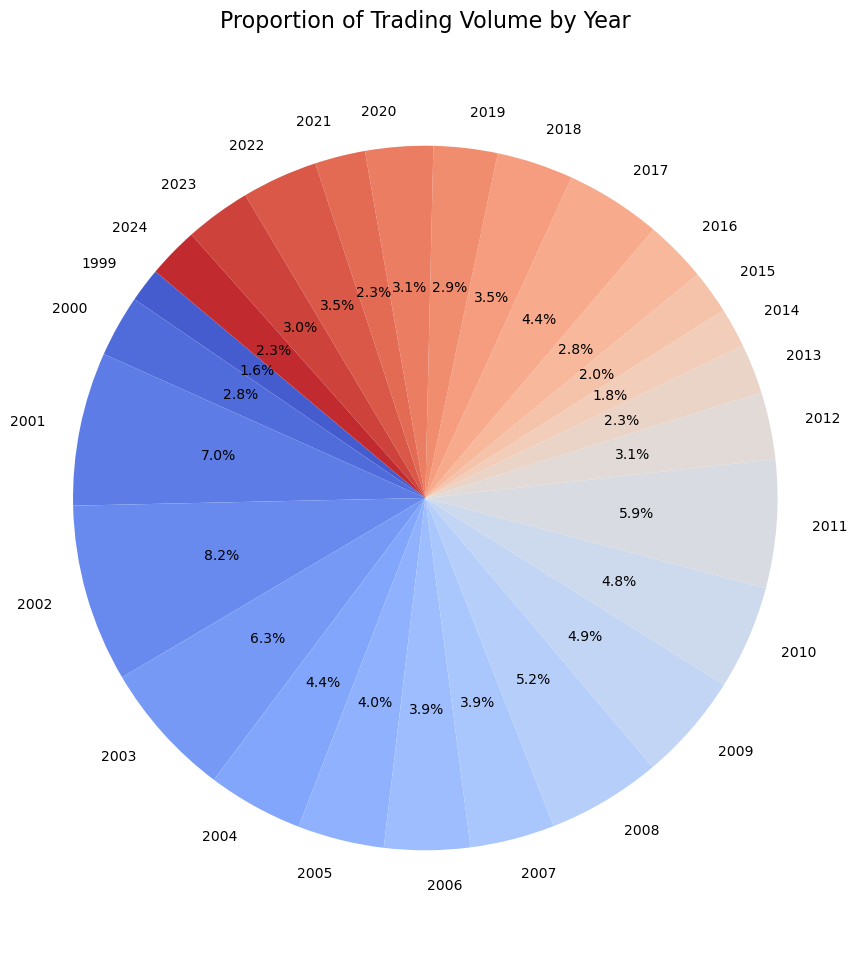

In [9]:
# Aggregating data by year for trading volume
data['Year'] = data.index.year
volume_by_year = data.groupby('Year')['Volume'].sum()

# Plotting the pie chart
plt.figure(figsize=(10,12))
plt.pie(volume_by_year, labels=volume_by_year.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(volume_by_year)))
plt.title('Proportion of Trading Volume by Year', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()
